In [1]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr) 
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘rvest’ was built under R version 4.0.2”
Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
─

# Classification of Pumpkin Seeds- DSCI 100


## Introduction


The identification of pumpkin seeds are extremely important within the seed sector as pumpkin seeds provide a range of carbohydrates, fats, proteins and mineral content. This project will investigate 2 classes of pumpkin seeds, “Ürgüp Sivrisi” and “Çerçevelik” grown in Turkey. The pumpkin seed data set will be used to identify the 2 classes published in 2021 by *Genetic Resources and Crop Evolution*. 

The question we will be answering is, **\"Given the parameters of two predictors, can we predict the seed type “Ürgüp Sivrisi” or “Çerçevelik” based on a k-nearest neighbors classification model to an accurate degree?**

The data set utilizes 12 attributes specific to the class of seed analyzed. Through analysis of the attributes, it was determined that **aspect ratio**  and **compactness** will be used to classify the pumpkin seeds as one of the two types. 

## Methods

### Tidying Data and Predictor Selection

Distribution/denstiy plot analysis was used to determine the 2 predictors used in the data analysis. We have chosen **aspect ratio**  and **compactness** as our predictors as the denstiy plot indicates the largest separation between the two classes. In order to create a possible data visualization of the analysis, only 2 predictors were selected.

The data was acquired from https://www.muratkoklu.com/datasets/ and https://doi.org/10.1007/s10722-021-01226-0. The class types were renamed in order for better continuity without accents and they were assigned to a class with as_factor().

In [2]:
set.seed(1234)
pumpkin_data<-read_csv("Pumpkin_Seeds_Dataset.csv")
pumpkin_data[pumpkin_data=="Çerçevelik"]<-"Cercevelik"
pumpkin_data[pumpkin_data=="Ürgüp Sivrisi"]<-"Urgup Sivrisi"
pumpkin_data<-pumpkin_data%>%
    mutate(Class=as_factor(Class))
pumpkin_data

pumpkin_split<-initial_split(pumpkin_data, prop = 0.75, strata = Class)
pumpkin_train <- training(pumpkin_split)
pumpkin_test <- testing(pumpkin_split)

Parsed with column specification:
cols(
  Area = col_double(),
  Perimeter = col_double(),
  Major_Axis_Length = col_double(),
  Minor_Axis_Length = col_double(),
  Convex_Area = col_double(),
  Equiv_Diameter = col_double(),
  Eccentricity = col_double(),
  Solidity = col_double(),
  Extent = col_double(),
  Roundness = col_double(),
  Aspect_Ration = col_double(),
  Compactness = col_double(),
  Class = col_character()
)



Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Cercevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Cercevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Cercevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Urgup Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Urgup Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Urgup Sivrisi


**Table 1 - Table of Variables for Ürgüp Sivrisi and Çerçevelik Pumpkin Seeds**

This table will be the dataframe utilized in the analysis. There are 13 columns with one of them being the class identification.The class identification is either “Urgup Sivrisi” or “Cercevelik” All other observations are numeric values. The predictors we utilized will be in columns 11 and 12 . 


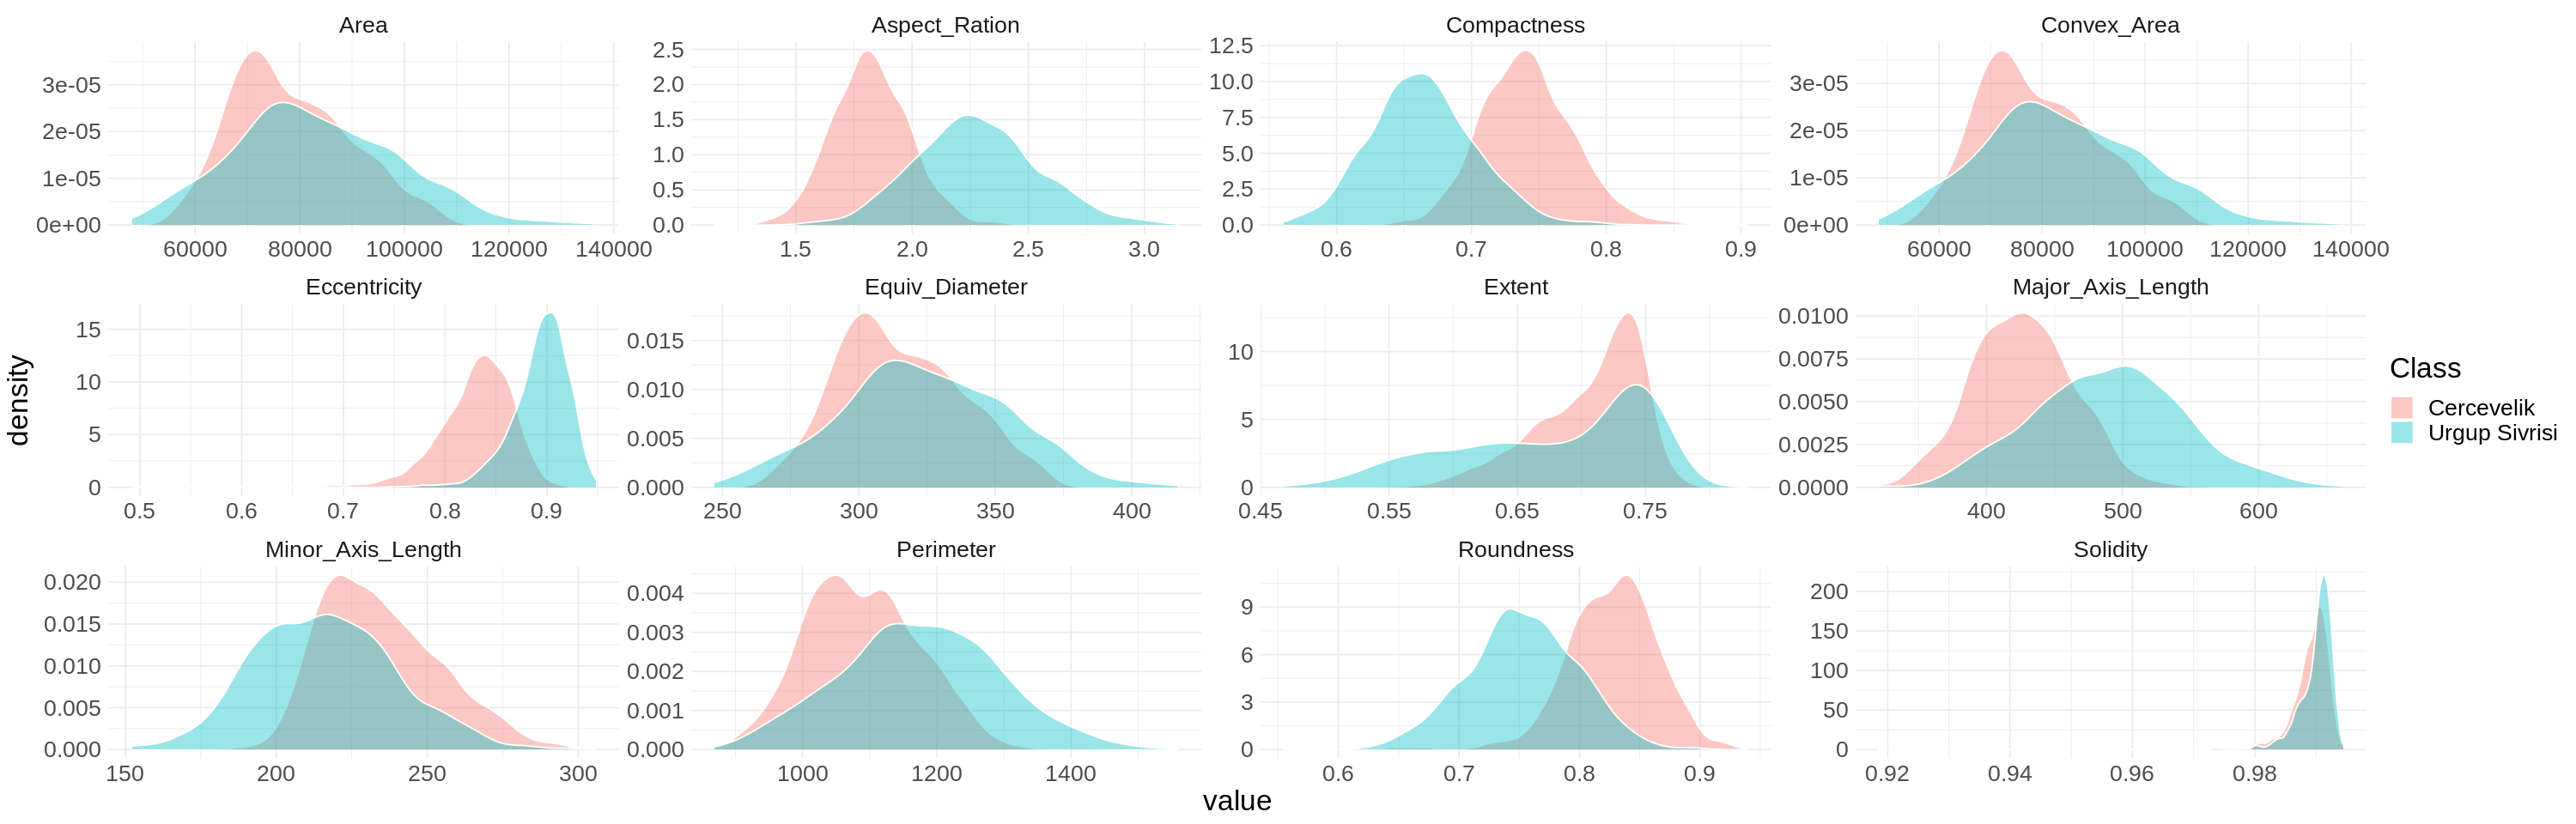

In [3]:
set.seed(1234)
options(repr.plot.width=25, repr.plot.height=8)
predictor_analysis<-pumpkin_data %>%
    pivot_longer(cols = -Class, names_to = 'category', values_to = 'value')  %>% 
    ggplot(aes(value, fill = Class)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(~ category, scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))
predictor_analysis

**Figure 1 - Histogram Distributions of Variables for Ürgüp Sivrisi and Çerçevelik Pumpkin Seeds**

The density and the units of the respective variable are analyzed to determine the separation degree of separation. The less overlap between the 2 variables, the better and more accurate the classification will be. The data is not yet standardized because each class's variable is compared to itself therefore the unit scaling is not yet relevant. We determined that Compactness and Aspect Ratio are the two most distinct varibales to utilize in our analysis. 

## Visualization of Test Data Distribution
Here is a visualization of how the pumpkin seed types are distributed based on the **Aspect Ratio** and **Compactness** predictors. We can visually identify a separation between Ürgüp Sivrisi and Çerçevelik based on these two attributes.

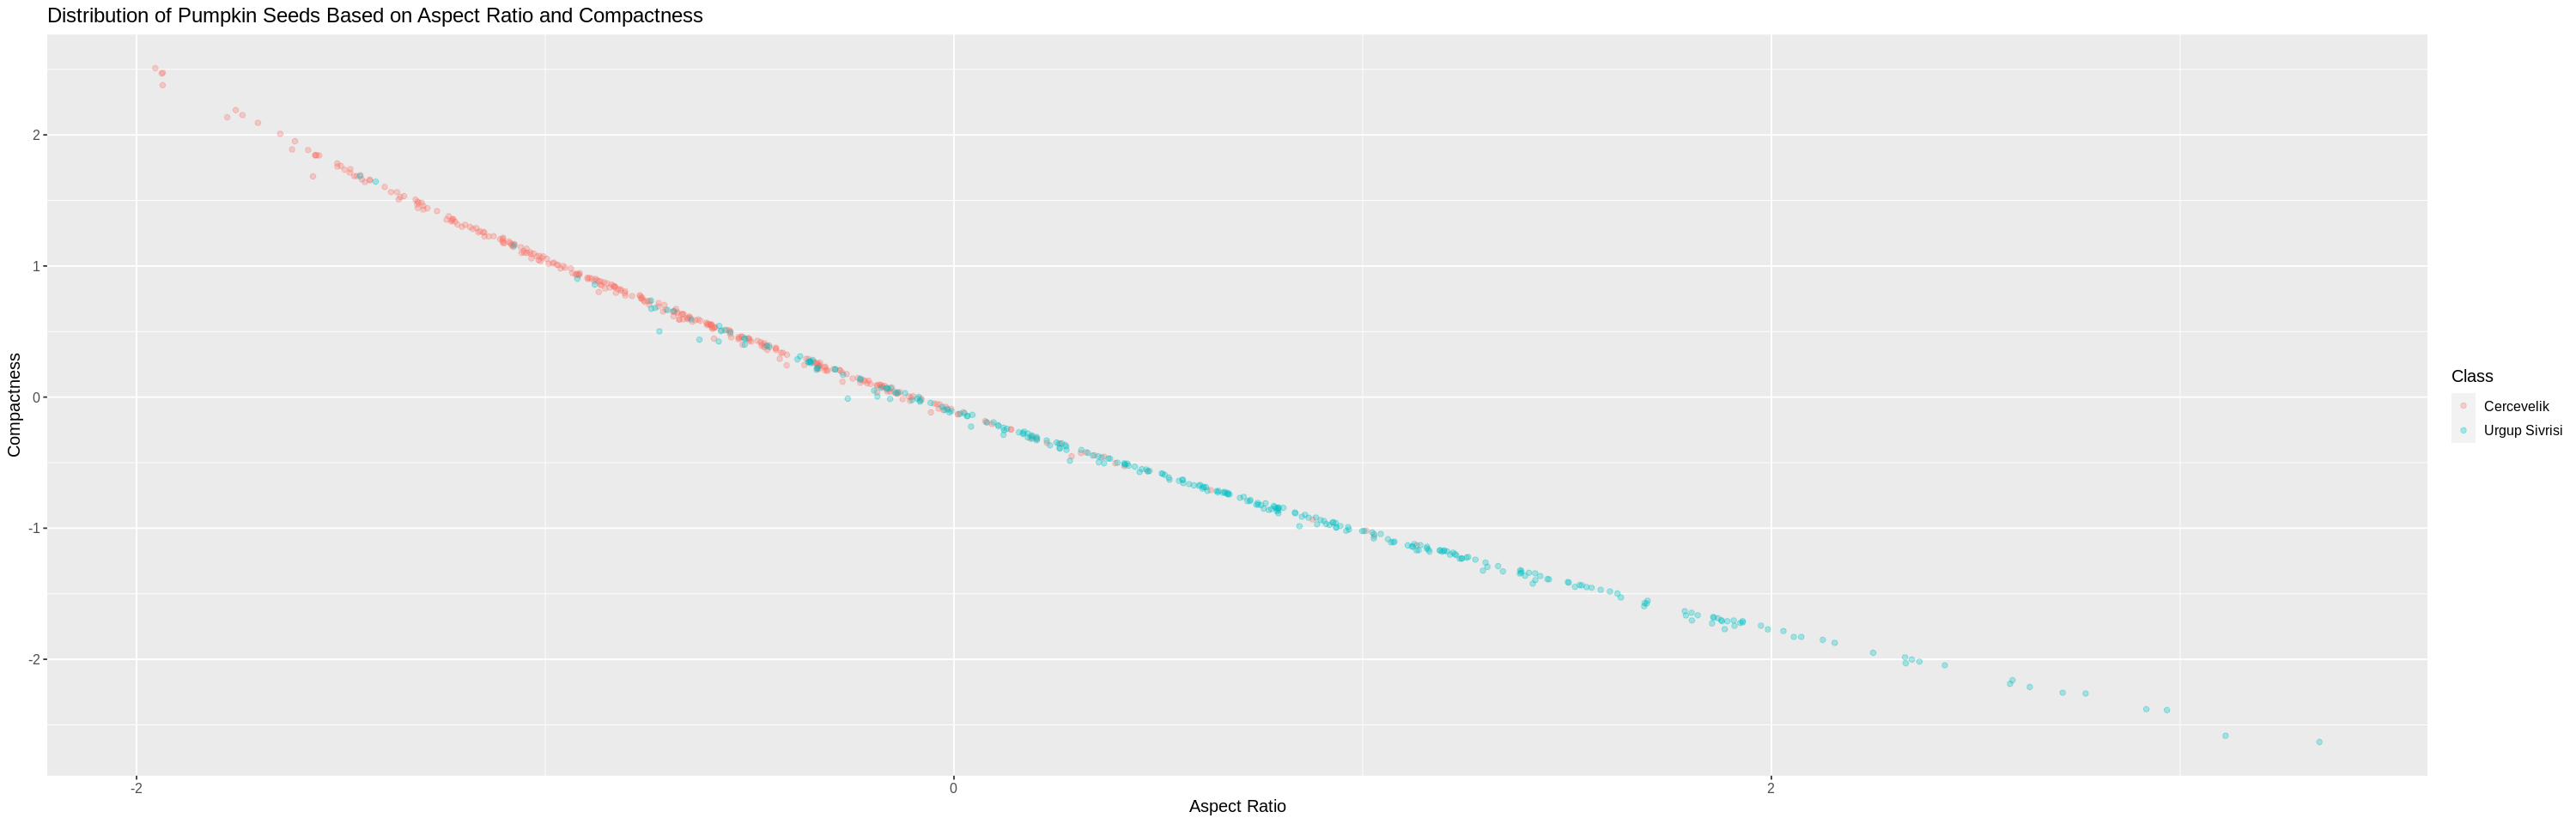

In [4]:
pumpkin_test_scaled <- pumpkin_test %>% mutate(across(Area:Compactness, scale))

pumpkin_plot <- ggplot(pumpkin_test_scaled, aes(x = Aspect_Ration, Compactness, color = Class)) +
                geom_point(alpha = 0.3) +
                labs(x = "Aspect Ratio", y = "Compactness") +
                ggtitle("Distribution of Pumpkin Seeds Based on Aspect Ratio and Compactness") +
                theme(text = element_text(size = 12))
pumpkin_plot

**Figure 2 - Distributions of Ürgüp Sivrisi and Çerçevelik Pumpkin Seeds Based on Aspect Ratio and Compactness**

In reality, these 2 independent variables are correlated which would cause problems when extrapolating results (multicollinearity) however this project will overlook this problem.

## Building the Classifier

In order to predict the class of pumpkin seeds, we utlizied the k-nearest neighbours classification algorithm in order to classify pumpkin seeds based on the given parameters. K-nearest neighbours uses the closest observations and their respective classes to classify the unknown observation. Based on how many “Ürgüp Sivrisi” and “Çerçevelik” seeds are nearby, the majority will decide what class the unknown seed is. 

Because we have identified our 2 wanted predictors, we needed to determine the best value of K to use in our model. To do this, we used 5-fold cross validation which splits our training data 5 equal portions. This method uses one chunk to test a value of K while the rest are used as training data. We are returned with a plot which gives us a range of accuracies and the number of neighbours used. We can use the K with the highest accuracy for our final model. 

This project specifically uses neighbours from 1 to 30(grid_vals). Proper tuning of a k-nn model was used which included creating the recipe with the predictors, model, splitting the training data and adding everything into workflow which allowed us to collect the acquired data and plot it on a scatter line plot. 

In [ ]:
set.seed(1234)
#recipe

pumpkin_recipe<-recipe(Class~Aspect_Ration +Compactness, data = pumpkin_train)%>%
    step_normalize(all_predictors())

#model

pumpkin_model<-nearest_neighbor(weight_func="rectangular", neighbors = tune())%>%
    set_engine("kknn") %>%
    set_mode("classification")

#resamples

pumpkin_vfold<-vfold_cv(pumpkin_train, v = 5, strata = Class)

#workflow 

pumpkin_workflow<-workflow()%>%
    add_recipe(pumpkin_recipe)%>%
    add_model(pumpkin_model)

#metrics

grid_vals=tibble(neighbors = seq(from=1,to =30))

pumpkin_metrics<-pumpkin_workflow%>%
    tune_grid(resamples = pumpkin_vfold, grid = grid_vals)%>%
    collect_metrics()

#Best k

accuracies<-pumpkin_metrics%>%
    filter(.metric=="accuracy")


best_k<-accuracies%>% 
    arrange(desc(mean))%>%
        select(neighbors)%>%
            slice(1)%>%
                pull()

#accuracy vs k-plot

options(repr.plot.width=25, repr.plot.height=8)

cross_val_plot<-accuracies%>% 
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + geom_line() +
    labs(x = "K neighbors", y = "Accuracy", title ="Accuracy VS K Neighbors")+
    theme(text = element_text(size = 20))+
    scale_x_continuous (breaks = seq(0,30, by = 1)) 
cross_val_plot

In [ ]:
pumpkin_metrics

In [ ]:
accuracies

In [ ]:
cross_val_plot

**Figure 2 - K Neighbors VS Accuracy Plot**

Line line-point visualization shows the accuracy estimation vs. the number of neighbours used. This allowed us to determine the optimal K value to use which returned the highest accuracy.

## Final K-NN Classification Model  

The final model uses the same recipe but a different model specification. The model takes the best K value from the tuning and uses it to predict the classes of the testing data. The K value used is ___. We call this model `best_model`. This is passed into the workflow which fits the new model, the recipe and the training data which trains our classifier. The testing data is not used since it would influence the accuracy of the predictions when the model is actually used. The model was used to calculate the accuracy in predicting the seed types of the testing data which was then analyzed with the confusion matrix.

In [13]:
set.seed(1234)
#recipe 
pumpkin_recipe

#model with best k
best_model<-nearest_neighbor(weight_func="rectangular", neighbors = best_k)%>% 
    set_engine("kknn")%>%
        set_mode("classification")

#fit
best_fit<-workflow()%>%
    add_recipe(pumpkin_recipe)%>%
        add_model(best_model)%>%
            fit(pumpkin_train)

#predictions
predictions<-best_fit%>%
    predict(pumpkin_test)%>%
        bind_cols(pumpkin_test)%>%
            mutate(Correctness = .pred_class == Class)
predictions

metrics<-predictions%>%
        metrics(truth = Class, estimate = .pred_class)%>%
            filter(.metric=="accuracy")

#confusion matrix
conf_mat<-predictions%>%
        conf_mat(truth = Class, estimate = .pred_class)

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Centering and scaling for all_predictors()

.pred_class,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,Correctness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
Cercevelik,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Cercevelik,TRUE
Cercevelik,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,Cercevelik,TRUE
Urgup Sivrisi,71393,1096.533,459.2091,199.1305,72203,301.4969,0.9011,0.9888,0.6000,0.7461,2.3061,0.6566,Cercevelik,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Urgup Sivrisi,51555,934.911,401.8321,164.7038,52013,256.2067,0.9121,0.9912,0.7187,0.7412,2.4397,0.6376,Urgup Sivrisi,TRUE
Cercevelik,84236,1274.656,456.9323,237.1540,85248,327.4944,0.8548,0.9881,0.6104,0.6515,1.9267,0.7167,Urgup Sivrisi,FALSE
Urgup Sivrisi,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Urgup Sivrisi,TRUE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8624


               Truth
Prediction      Cercevelik Urgup Sivrisi
  Cercevelik           303            64
  Urgup Sivrisi         22           236

In [7]:
metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8624


In [ ]:
conf_mat

## Final Visualization (Number of Correct and Incorrect Predictions)

In [ ]:
predictions_data<- predictions%>%
    mutate(Correctness = as_factor(Correctness)) %>%
    group_by(Correctness, Class) %>%
    summarize(count = n(), prop = count / nrow(predictions))

options(repr.plot.width=10, repr.plot.height=8)

proportions_plot <- ggplot(predictions_data, aes(x = Class,y = count, fill = as_factor(Correctness))) + 
    geom_bar(position = "fill", stat = "identity")+
    labs(fill = "Correctness of Prediction")+
    theme(text = element_text(size = 20))+
    xlab("Class of Pumpkin Seed")+
    ylab("Proportion of Right Predictions")+
    scale_y_continuous (breaks = seq(0,1, by = 0.1)) 

proportions_plot

**Figure**

This proportional bar graph indicates the proportion of correct and incorrect predictions made by our classifier. The blue/TRUE indicates that the classification on the testing data was correct while the red/FALSE indicates the classification was incorrect. This visualization shows that the class Cercevelik had an accurate prediction of around 93% (303/325 x 100) and the class Urgup Sirvrisi had an accuracy of around 79% (236/300 x 100). The accuracy of Cercevelik was predicted more accurately than Urgup Sivrisi. 

## Results

## Discussion

### Citations

1. Koklu, M., Sarigil, S., &amp; Ozbek, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713–2726. https://doi.org/10.1007/s10722-021-01226-0 

2. Salgın, U., &amp; Korkmaz, H. (2011). A green separation process for recovery of healthy oil from Pumpkin Seed. The Journal of Supercritical Fluids, 58(2), 239–248. https://doi.org/10.1016/j.supflu.2011.06.002 

Data acquired from: https://www.muratkoklu.com/datasets/